# Exploratory Data Analysis and train test split

In [4]:
import pandas as pd
df1 = pd.read_csv("train.csv")
df1.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
df1.describe()
print (df1.shape)
print (df1.dtypes)
df1.head()

(913000, 4)
date     object
store     int64
item      int64
sales     int64
dtype: object


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [6]:
#filterting to get store 1 and 5 items

# Filter rows based on store id and item code criteria
df_filtered = df1[(df1['store'] == 1) & (df1['item'] <= 5)]

df_filtered = df_filtered.drop(columns=['store'])

# Write the filtered dataframe to a new CSV file
df_filtered.to_csv('filtered.csv', index=False)

df = pd.read_csv('filtered.csv')
df.describe()
print (df.shape)
print (df.dtypes)
df.head()



(9130, 3)
date     object
item      int64
sales     int64
dtype: object


,date,item,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10


In [7]:
df.tail()

,date,item,sales
9125,2017-12-27,5,6
9126,2017-12-28,5,15
9127,2017-12-29,5,17
9128,2017-12-30,5,22
9129,2017-12-31,5,17


In [8]:
df["date"] = pd.to_datetime(df["date"])
df["date"] = pd.to_datetime(df["date"])
df["year_month"] = df["date"].dt.to_period('M')
df["year_month"] = df["year_month"].astype(str)
df = df.groupby(["year_month", "item"]).agg({"sales":"sum"})
df = df.reset_index()
df.head()

,year_month,item,sales
0,2013-01,1,328
1,2013-01,2,911
2,2013-01,3,547
3,2013-01,4,346
4,2013-01,5,276


In [9]:
df.tail()

,year_month,item,sales
295,2017-12,1,533
296,2017-12,2,1475
297,2017-12,3,873
298,2017-12,4,497
299,2017-12,5,436


Data Plotting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


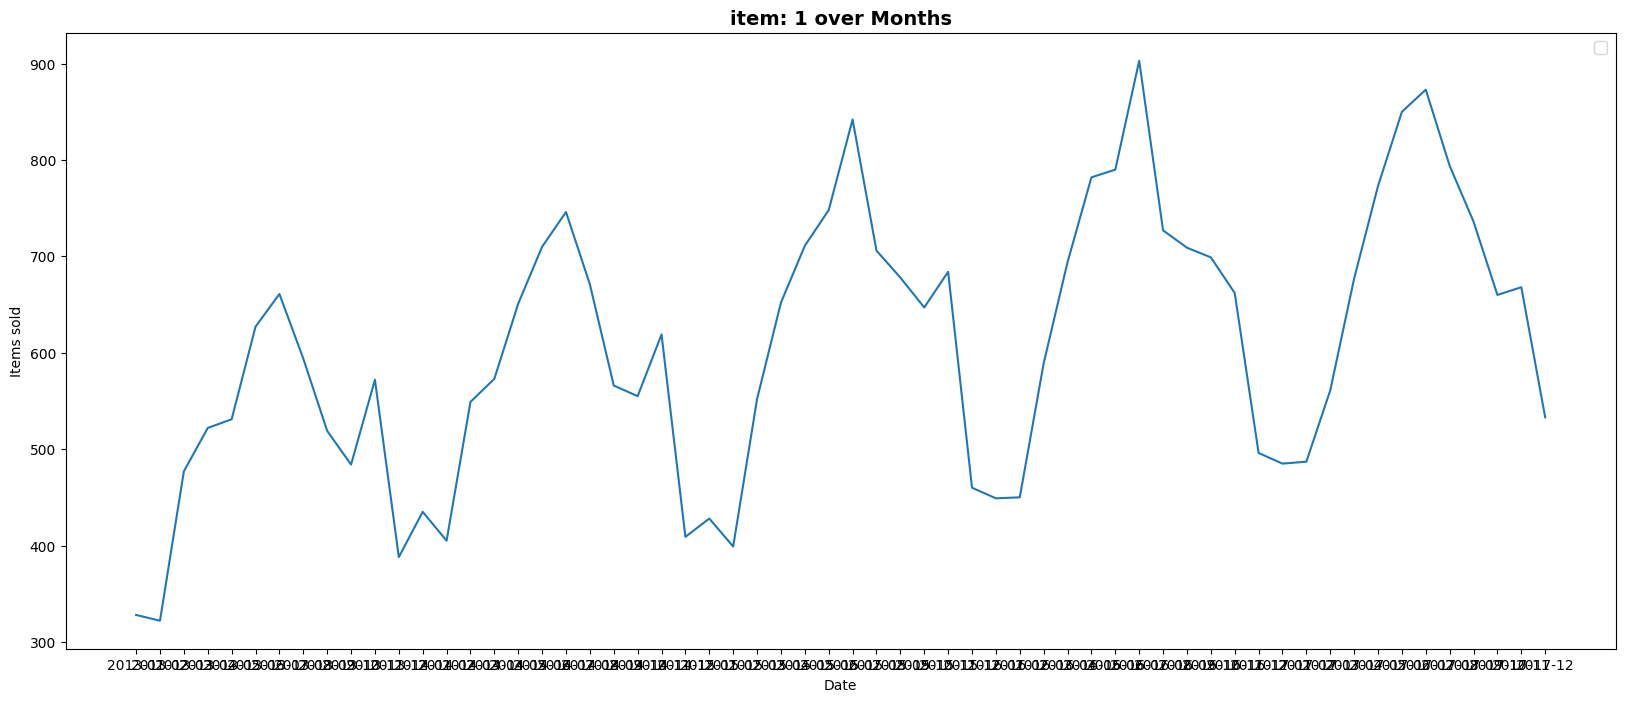

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


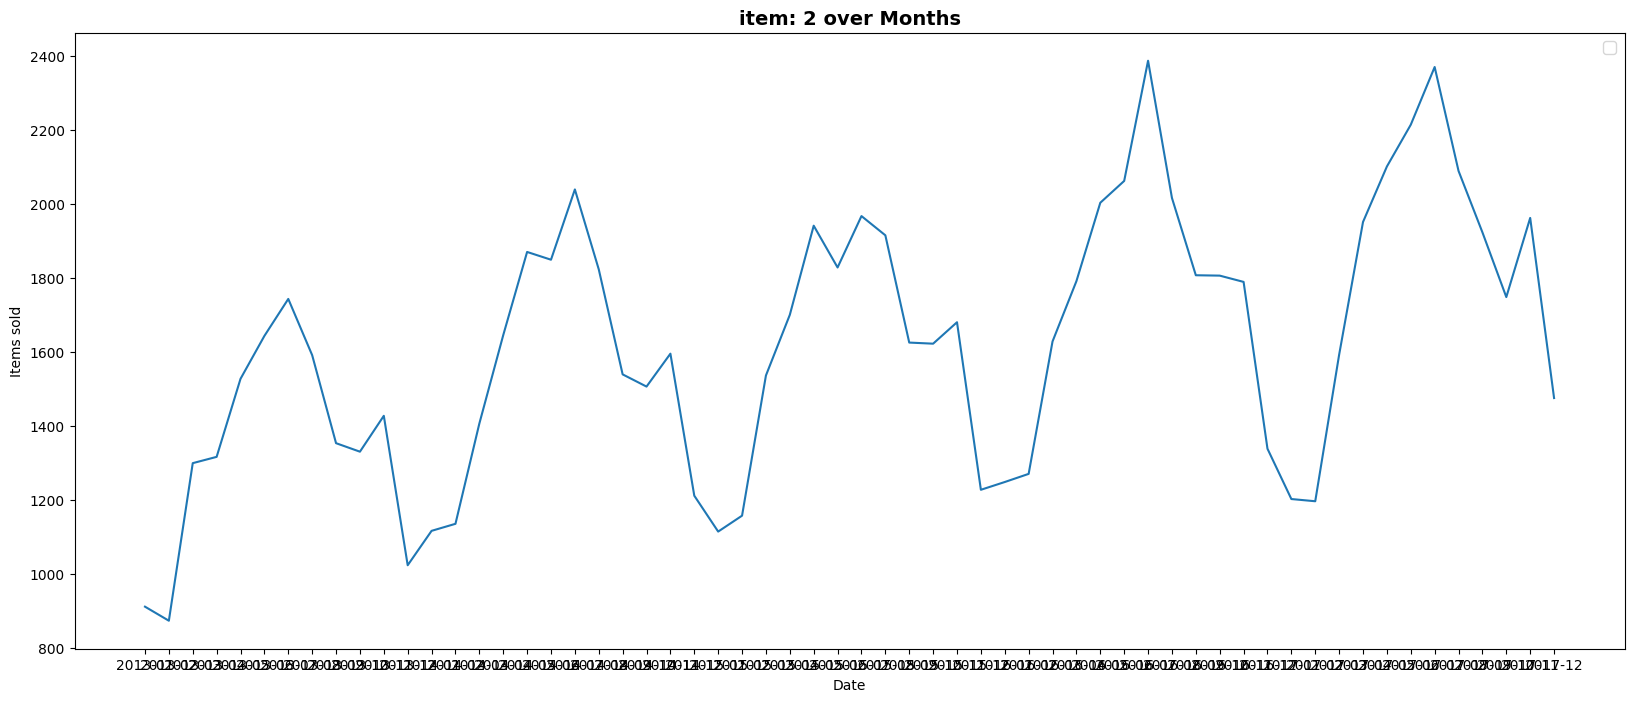

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


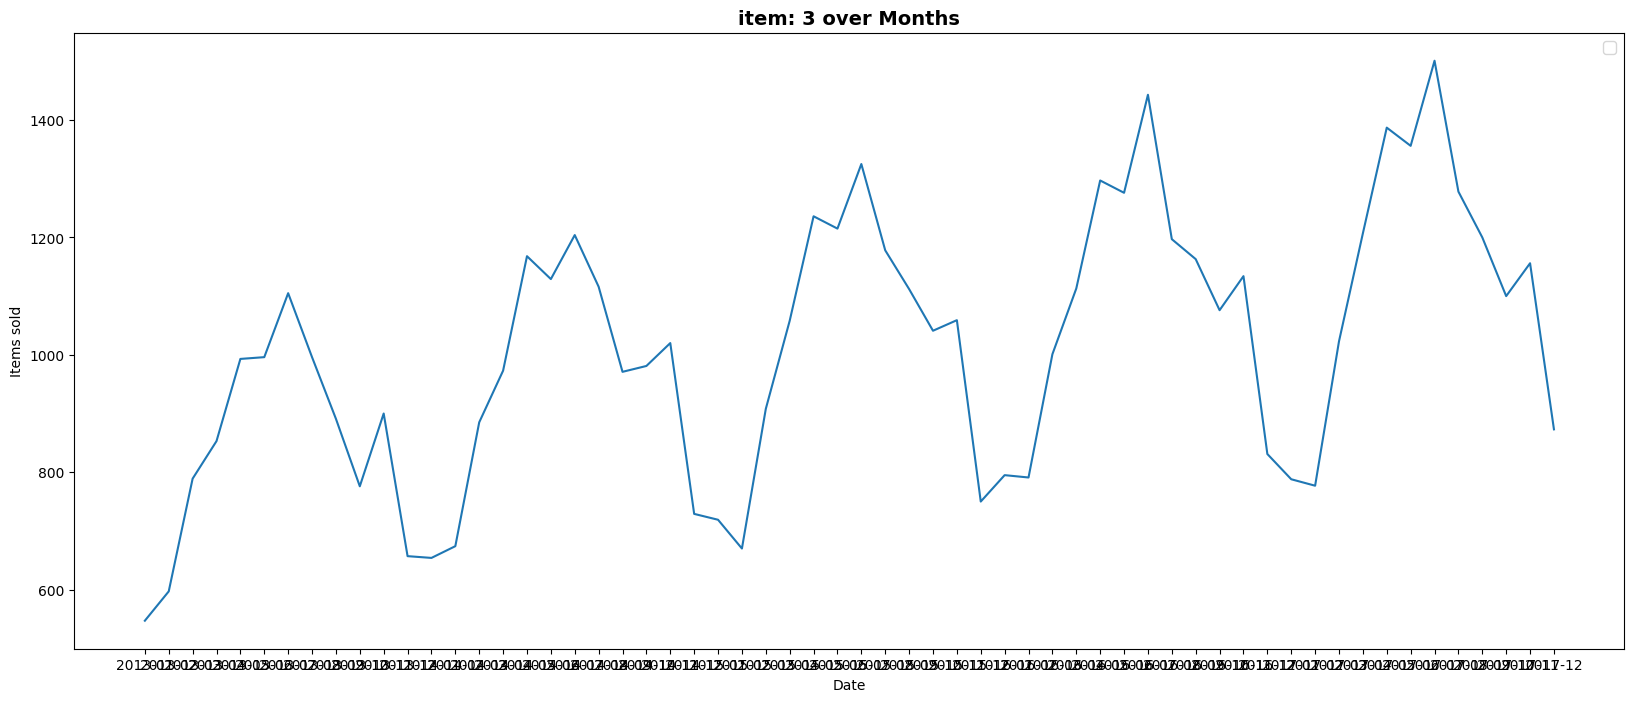

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


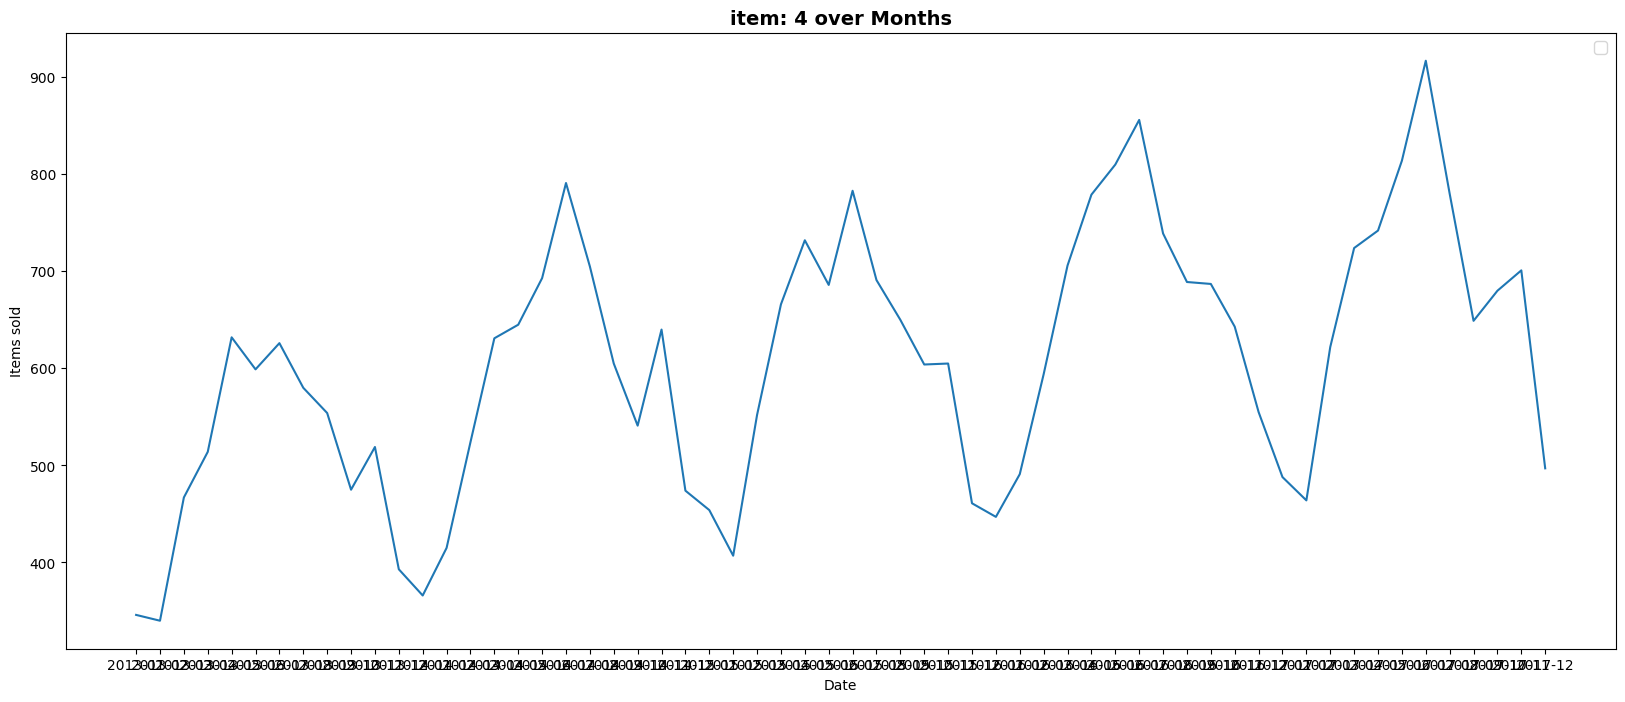

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


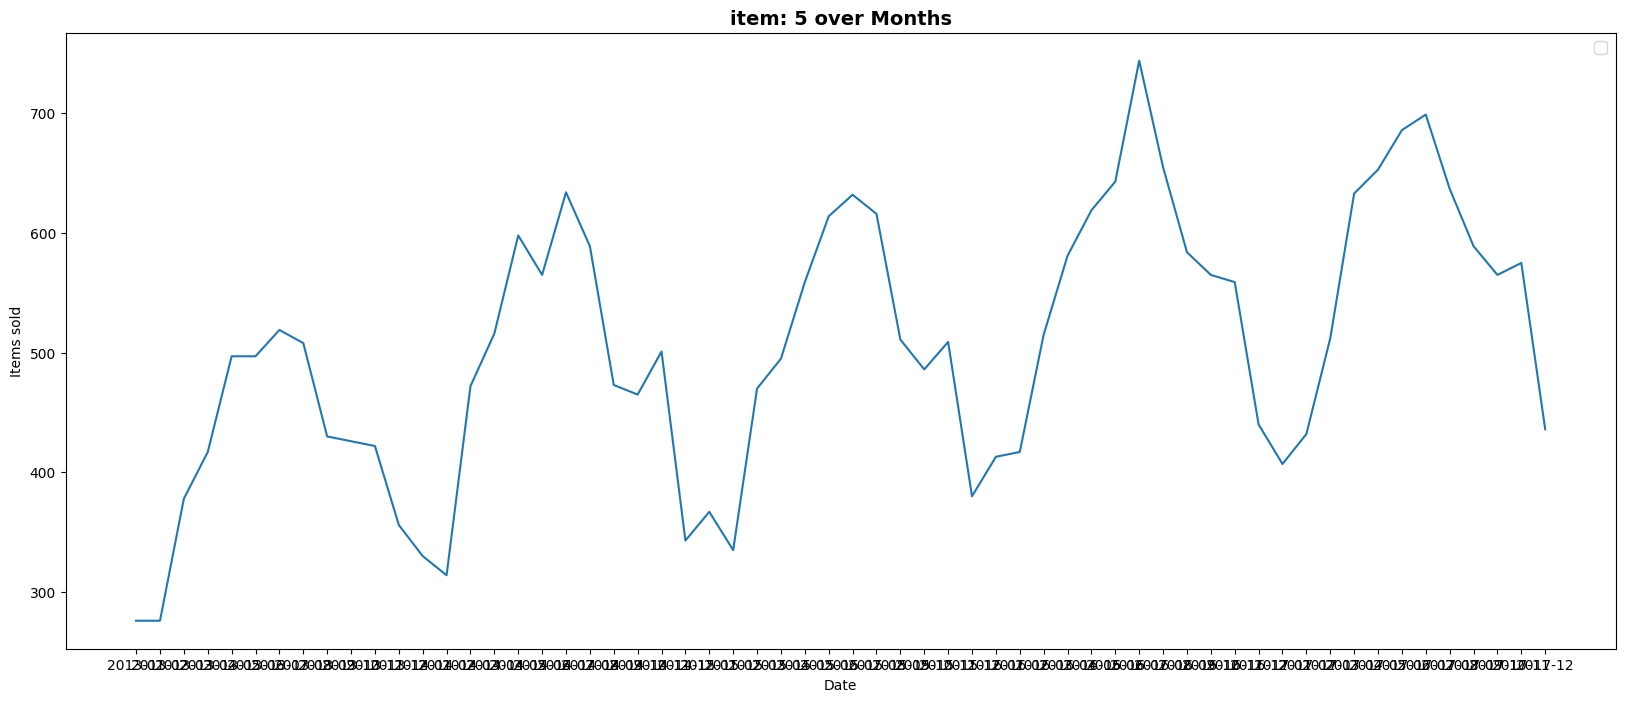

In [10]:
import matplotlib.pyplot as plt



def plot_sales(item_num):
    plt.figure(figsize = (20, 8))
    plt.plot(df.loc[(df["item"]==item_num),"year_month"], 
             df.loc[(df["item"]==item_num),"sales"])
    # başlık, etiketler ve eksenlerin stillerini güncelleme
    plt.title(f"item: {item_num} over Months", 
              fontsize = 14, fontweight = "bold")
    plt.ylabel("Items sold")
    plt.xlabel("Date")
    plt.legend(fontsize = "large")
    plt.show()
for i in range(1,6):
    item_num = i
    plot_sales(item_num)



Splitting into train and test dataset

In [11]:
from sklearn.model_selection import train_test_split

df = df.sort_values(by='year_month')

# Split the filtered data into training and testing datasets
train_data, test_data = train_test_split(df, test_size=0.2)

train_data = train_data.sort_values(by='year_month')
test_data = test_data.sort_values(by='year_month')

# Save the training and testing datasets to new CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

train_df = pd.read_csv("train_data.csv")
train_df.describe()
print(train_df.shape)
train_df.head()


(240, 3)


,year_month,item,sales
0,2013-01,5,276
1,2013-01,4,346
2,2013-01,1,328
3,2013-01,2,911
4,2013-02,2,873


In [12]:
test_df = pd.read_csv("test_data.csv")
test_df.describe()
print(test_df.shape)
test_df.head()


(60, 3)


,year_month,item,sales
0,2013-01,3,547
1,2013-02,1,322
2,2013-03,1,477
3,2013-05,4,632
4,2013-06,4,599


# Creating Dataset schema

## Reading the keys

In [13]:
# First, set up logging so we can see the actions performed by the SDK behind the scenes
import logging
import sys

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

from pprint import pprint # for nicer output formatting

In [14]:
import json
import os

if not os.path.exists("default_key.json"):
    msg = "'default_key.json' is not found. Please follow instructions above to create a service key of"
    msg += " Data Attribute Recommendation. Then, upload it into the same directory where"
    msg += " this notebook is saved."
    print(msg)
    raise ValueError(msg)

with open("default_key.json") as file_handle:
    key = file_handle.read()
    SERVICE_KEY = json.loads(key)
    print("Service URL: ")
    pprint(SERVICE_KEY["url"])
    print("Client ID:")
    pprint(SERVICE_KEY["uaa"]["clientid"])

Service URL: 
'https://aiservices-trial-dar.cfapps.us10.hana.ondemand.com'
Client ID:
'sb-6b326536-25b2-4840-85d4-468a1d9b9573!b145582|dar-std-trial!b40577'


In [15]:
! pip install data-attribute-recommendation-sdk

## Creating Dataset Schema

In [16]:
from sap.aibus.dar.client.data_manager_client import DataManagerClient

dataset_schema = {
    "features": [
        {"label": "year_month", "type": "TEXT"},
        {"label": "item", "type": "NUMBER"},
    ],
    "labels": [
        {"label": "sales", "type": "NUMBER"}
    ],
    "name": "demand_forecasting"
}


data_manager = DataManagerClient.construct_from_service_key(SERVICE_KEY)
response = data_manager.create_dataset_schema(dataset_schema)
dataset_schema_id = response["id"]

print()
print("DatasetSchema created:")

pprint(response)

print()
print(f"DatasetSchema ID: {dataset_schema_id}")

INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Creating DatasetSchema.
INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Created DatasetSchema with ID '8111b7f8-e237-4064-884d-3860cda85775'

DatasetSchema created:
{'createdAt': '2023-05-09T06:45:32.338063+00:00',
 'features': [{'label': 'year_month', 'type': 'TEXT'},
              {'label': 'item', 'type': 'NUMBER'}],
 'id': '8111b7f8-e237-4064-884d-3860cda85775',
 'labels': [{'label': 'sales', 'type': 'NUMBER'}],
 'name': 'demand_forecasting'}

DatasetSchema ID: 8111b7f8-e237-4064-884d-3860cda85775


## Uploading Data 

In [17]:
dataset_resource = data_manager.create_dataset("demand_forecasting", dataset_schema_id)
dataset_id = dataset_resource["id"]

print()
print("Dataset created:")

pprint(dataset_resource)

print()
print(f"Dataset ID: {dataset_id}")

INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Creating Dataset with dataset_name 'demand_forecasting' and dataset_schema_id '8111b7f8-e237-4064-884d-3860cda85775'
INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Created Dataset with ID 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5'

Dataset created:
{'createdAt': '2023-05-09T06:45:33.073480+00:00',
 'datasetSchemaId': '8111b7f8-e237-4064-884d-3860cda85775',
 'id': 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5',
 'name': 'demand_forecasting',
 'status': 'NO_DATA',
 'validationMessage': ''}

Dataset ID: a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5


In [18]:
# Open in binary mode.
with open('train_data.csv', 'rb') as file_handle:
    dataset_resource = data_manager.upload_data_to_dataset(dataset_id, file_handle)

print()
print("Dataset after data upload:")
print()
pprint(dataset_resource)

INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Uploading data for dataset_id 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5'

Dataset after data upload:

{'createdAt': '2023-05-09T06:45:33.073480+00:00',
 'datasetSchemaId': '8111b7f8-e237-4064-884d-3860cda85775',
 'id': 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5',
 'name': 'demand_forecasting',
 'status': 'VALIDATING',
 'validationMessage': ''}


### Waiting for data validation

In [19]:
dataset_resource = data_manager.wait_for_dataset_validation(dataset_id)

print()
print("Dataset after validation has finished:")

print()
pprint(dataset_resource)

INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Waiting for validation of Dataset ID 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5' to succeed!
INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Polling status on Dataset ID 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5'
INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Polling status on Dataset ID 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5'
INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Polling status on Dataset ID 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5'
INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Polling status on Dataset ID 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5'
INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Polling status on Dataset ID 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5'
INFO:sap.aibus.dar.client.data_manager_client.DataManagerClient:Polling status on Dataset ID 'a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5'
INFO:sap.aibus.dar.client.data_manager_client.DataManage

# Training the Model

In [20]:
from sap.aibus.dar.client.model_manager_client import ModelManagerClient
from sap.aibus.dar.client.exceptions import DARHTTPException

model_manager = ModelManagerClient.construct_from_service_key(SERVICE_KEY)

In [21]:
model_template_id = "bdbcd699-4419-40a5-abb8-e7ad43dde49b" # regression template
model_name = "demand_forecasting"

job_resource = model_manager.create_job(model_name, dataset_id, model_template_id)
job_id = job_resource['id']

print()
print("Job resource:")
print()

pprint(job_resource)

print()
print(f"ID of submitted Job: {job_id}")

INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Creating job with model_name: demand_forecasting, dataset_id: a67d6e18-38bc-4b37-ac2d-bad40c4fa4e5, model_template_id: bdbcd699-4419-40a5-abb8-e7ad43dde49b


DARHTTPException: DARHTTPException
URL: 'https://aiservices-trial-dar.cfapps.us10.hana.ondemand.com/model-manager/api/v3/jobs'
Method: 'POST'
Status Code: '400'
Status Reason: 'Bad Request'
Response Body: '{
    "X-Correlation-ID": "f595c6b9-edae-46a2-4e00-1ea03531e624",
    "message": "The model name specified is already in use. Please select a different model name.",
    "status": 400
}'
Correlation ID: 'f595c6b9-edae-46a2-4e00-1ea03531e624'
VCAP Request ID: 'f595c6b9-edae-46a2-4e00-1ea03531e624'
CF Router Error: 'None'
Server Header: ''
Exception Timestamp: '2023-05-09T06:48:13.095424+00:00'


### Waiting for training the Model

In [ ]:
ob_resource = model_manager.wait_for_job(job_id)

print()

print("Job resource after training is finished:")

pprint(job_resource)

INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Waiting for job '99140324-faa5-4bf4-bc29-cc1672f03f31' to finish.
INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Polling for status of job '99140324-faa5-4bf4-bc29-cc1672f03f31'
INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Job '99140324-faa5-4bf4-bc29-cc1672f03f31': status 'RUNNING', progress: '0.0'
INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Polling for status of job '99140324-faa5-4bf4-bc29-cc1672f03f31'
INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Job '99140324-faa5-4bf4-bc29-cc1672f03f31': status 'RUNNING', progress: '0.0'
INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Polling for status of job '99140324-faa5-4bf4-bc29-cc1672f03f31'
INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Job '99140324-faa5-4bf4-bc29-cc1672f03f31': status 'SUCCEEDED', progress: '1.0'
INFO:sap.aibus.dar.client.model_manager_c

In [22]:
model_resource = model_manager.read_model_by_name(model_name)

print()
pprint(model_resource)



{'createdAt': '2023-05-09T04:50:02+00:00',
 'jobId': '99140324-faa5-4bf4-bc29-cc1672f03f31',
 'name': 'demand_forecasting',
 'validationResult': {'meanAbsoluteError': 316.61222076416016,
                      'meanAbsolutePercentageError': 43.225690308988504,
                      'meanSquaredError': 169679.03010521876}}


# Deploying the Model

In [ ]:

d = model_manager.read_deployment_collection()
print(d)

{'count': 1, 'deployments': [{'deployedAt': '2023-03-24T15:50:06.421000+00:00', 'id': 'ms-3e87b011-3d72-48f1-85d8-07b1e39fb533', 'modelName': 'reg_model'}]}


In [ ]:
model_manager.delete_deployment_by_id('ms-3e87b011-3d72-48f1-85d8-07b1e39fb533')

INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Deleting Deployment with ID 'ms-3e87b011-3d72-48f1-85d8-07b1e39fb533'


In [ ]:
d = model_manager.read_deployment_collection()
print(d)

{'count': 0, 'deployments': []}


In [ ]:
deployment_resource =  model_manager.create_deployment(model_name)
deployment_id = deployment_resource["id"]

print()
print("Deployment resource:")
print()

pprint(deployment_resource)


print(f"Deployment ID: {deployment_id}")

INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Creating Deployment for model_name 'demand_forecasting'
INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Created Deployment for model_name 'demand_forecasting' with ID 'ms-b67221ed-5d8e-45a7-bee8-86e80f7a5ff5'

Deployment resource:

{'deployedAt': None,
 'id': 'ms-b67221ed-5d8e-45a7-bee8-86e80f7a5ff5',
 'modelName': 'demand_forecasting',
 'status': 'PENDING'}
Deployment ID: ms-b67221ed-5d8e-45a7-bee8-86e80f7a5ff5


### Waiting for Deployment

In [ ]:
deployment_resource = model_manager.wait_for_deployment(deployment_id)

print()
print("Finished deployment resource:")
print()

pprint(deployment_resource)

INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Waiting for Deployment ID 'ms-b67221ed-5d8e-45a7-bee8-86e80f7a5ff5' to succeed!
INFO:sap.aibus.dar.client.model_manager_client.ModelManagerClient:Deployment 'ms-b67221ed-5d8e-45a7-bee8-86e80f7a5ff5' has status: SUCCEEDED

Finished deployment resource:

{'deployedAt': '2023-05-09T05:47:04.334000+00:00',
 'id': 'ms-b67221ed-5d8e-45a7-bee8-86e80f7a5ff5',
 'modelName': 'demand_forecasting',
 'status': 'SUCCEEDED'}


### Ask for inputs from user

In [23]:
from sap.aibus.dar.client.inference_client import InferenceClient

inference = InferenceClient.construct_from_service_key(SERVICE_KEY)

objects_to_be_classified = [
    {
        "features": [
            {"name": "year_month", "value": "2017-11"},
            {"name": "item", "value": "4"},
            
        ],
    },
    {
        "features": [
            {"name": "year_month", "value": "2017-12"},
            {"name": "item", "value": "2"},
            
        ],
    },
    {
        "features": [
            {"name": "year_month", "value": "2017-12"},
            {"name": "item", "value": "3"},
            
        ],
    },
    {
        "features": [
            {"name": "year_month", "value": "2017-12"},
            {"name": "item", "value": "5"},
            
        ],
    },
]

inference_response = inference.create_inference_request(model_name, objects_to_be_classified)
print (type(inference_response))

print()
print("Inference request processed. Response:")
print()
pprint(inference_response)

<class 'dict'>

Inference request processed. Response:

{'id': '5561e7f0-48bd-451f-733a-4d4b648d223e',
 'predictions': [{'labels': [{'name': 'sales',
                              'results': [{'std': 94.7176895142,
                                           'value': '735.3883666992'}]}],
                  'objectId': None},
                 {'labels': [{'name': 'sales',
                              'results': [{'std': 105.1851043701,
                                           'value': '858.7806396484'}]}],
                  'objectId': None},
                 {'labels': [{'name': 'sales',
                              'results': [{'std': 99.4463119507,
                                           'value': '797.3674926758'}]}],
                  'objectId': None},
                 {'labels': [{'name': 'sales',
                              'results': [{'std': 97.7552566528,
                                           'value': '687.9298706055'}]}],
                  'objectId': None}],
 'p

In [ ]:
train_df.tail()

,year_month,item,sales
235,2017-11,4,701
236,2017-12,2,1475
237,2017-12,3,873
238,2017-12,5,436
239,2017-12,4,497


In [25]:
# Define the output file path
output_file_path = 'D://study PDF//SAP//SAP BTP//Demand forecasting project//Python_related//items_dict.json'

# Open the output file in write mode
with open(output_file_path, 'w') as f:
    # Convert the dictionary to a JSON string and write it to the file
    json.dump(inference_response, f)

# Print a success message
print(f"The dictionary has been saved to the file {output_file_path}.")

The dictionary has been saved to the file D://study PDF//SAP//SAP BTP//Demand forecasting project//Python_related//items_dict.json.
